In [52]:
import pandas as pd
import numpy as np

# Load the data

In [53]:
fake = pd.read_csv('archive/Fake.csv')
real = pd.read_csv('archive/True.csv')

In [54]:
fake['label'] = 1
real['label'] = 0

In [55]:
data = pd.concat([real, fake])

In [56]:
data = data.sample(frac=1).reset_index(drop=True)

/home/anja/Projects/tdt13-project/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


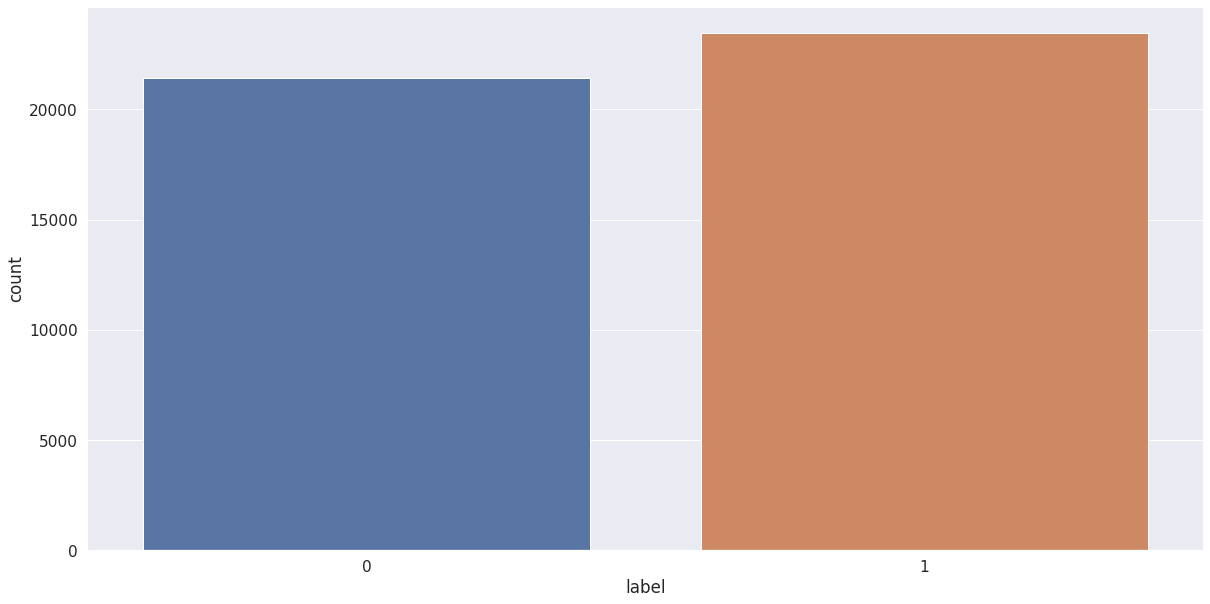

In [57]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(data['label']);

The data is well-balanced in terms of labels.

In [58]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

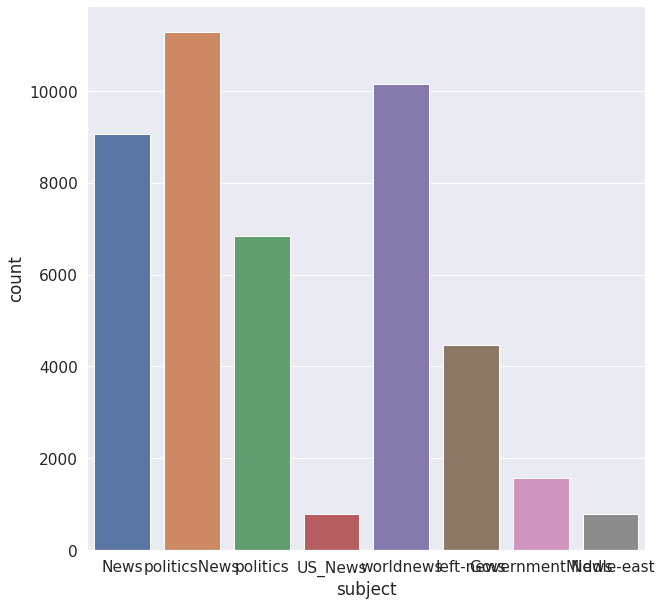

In [59]:
import matplotlib.pyplot as plt
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.countplot(x=data['subject']);

There are 8 different news subjects, where political news are the most frequent. However, there are no

[Text(0, 0, '0'), Text(1, 0, '1')]

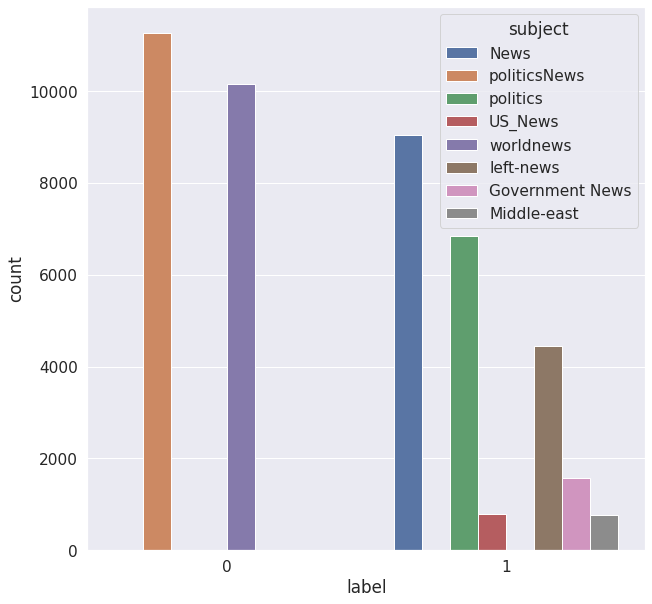

In [60]:
plt.figure(figsize = (10,10))
chart = sns.countplot(x = "label", hue = "subject" , data = data)
chart.set_xticklabels(chart.get_xticklabels())

Of the 

In [61]:
data.drop(['date'], axis=1, inplace=True)

# Preprocess the data

In [62]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/anja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Convert to lowercase, remove punctuation and tokenize

In [63]:
import string

punct = string.punctuation + '“”‘’'

def clean(article):
    lowercase = article.lower()
    punctuation = "".join([char for char in lowercase if char not in punct])
    tokens = nltk.word_tokenize(punctuation)
    return tokens

In [64]:
tokens = clean(data.iloc[0].text)

In [65]:
#data['tokenized'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

### Remove stop words

In [66]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stop_words(tokens):
    filtered = [word for word in tokens if word not in stop_words]
    return filtered

In [67]:
filtered = remove_stop_words(tokens)

In [68]:
filtered

['absolutely',
 'insane',
 'much',
 'one',
 'man',
 'screw',
 'donald',
 'trump',
 'exceeded',
 'expectations',
 'well',
 'way',
 'ruining',
 'entire',
 'country',
 'already',
 'made',
 'pretty',
 'big',
 'dent',
 'goal',
 'singlehandedly',
 'brought',
 'value',
 'brand',
 'thanks',
 'idiocy',
 'unpopular',
 'rhetoricthe',
 'trump',
 'name',
 'hated',
 'even',
 'beloved',
 'family',
 'member',
 'daughter',
 'ivanka',
 'suffering',
 'father',
 'madness',
 'erratic',
 'behavior',
 'recently',
 'retail',
 'giant',
 'nordstrom',
 'decided',
 'pull',
 'ivanka',
 'brand',
 'inventory',
 'due',
 'declining',
 'sales',
 'pesky',
 'antitrump',
 'boycotting',
 'campaign',
 'called',
 'grab',
 'wallet',
 'nordtrom',
 'president',
 'pete',
 'nordstrom',
 'originally',
 'said',
 'dropping',
 'ivanka',
 'line',
 'sharply',
 'divisive',
 'subject',
 'matter',
 'going',
 'end',
 'disappointing',
 'customers',
 'every',
 'single',
 'brand',
 'offer',
 'evaluated',
 'results',
 'people',
 'buy',
 'sell'

In [69]:
tagged = nltk.pos_tag(filtered)
tagged

[('absolutely', 'RB'),
 ('insane', 'JJ'),
 ('much', 'RB'),
 ('one', 'CD'),
 ('man', 'NN'),
 ('screw', 'VBD'),
 ('donald', 'JJ'),
 ('trump', 'NN'),
 ('exceeded', 'VBD'),
 ('expectations', 'NNS'),
 ('well', 'RB'),
 ('way', 'NN'),
 ('ruining', 'VBG'),
 ('entire', 'JJ'),
 ('country', 'NN'),
 ('already', 'RB'),
 ('made', 'VBD'),
 ('pretty', 'RB'),
 ('big', 'JJ'),
 ('dent', 'NN'),
 ('goal', 'NN'),
 ('singlehandedly', 'RB'),
 ('brought', 'VBD'),
 ('value', 'NN'),
 ('brand', 'NN'),
 ('thanks', 'NNS'),
 ('idiocy', 'VBP'),
 ('unpopular', 'JJ'),
 ('rhetoricthe', 'NN'),
 ('trump', 'NN'),
 ('name', 'NN'),
 ('hated', 'VBD'),
 ('even', 'RB'),
 ('beloved', 'VBN'),
 ('family', 'NN'),
 ('member', 'NN'),
 ('daughter', 'NN'),
 ('ivanka', 'NN'),
 ('suffering', 'VBG'),
 ('father', 'JJR'),
 ('madness', 'NN'),
 ('erratic', 'JJ'),
 ('behavior', 'NN'),
 ('recently', 'RB'),
 ('retail', 'JJ'),
 ('giant', 'NN'),
 ('nordstrom', 'NN'),
 ('decided', 'VBD'),
 ('pull', 'JJ'),
 ('ivanka', 'NN'),
 ('brand', 'NN'),
 ('inv

In [70]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [71]:
swn_tagged = list(map(lambda word: (word[0], get_wordnet_pos(word[1])), tagged))

In [72]:
swn_tagged

[('absolutely', 'r'),
 ('insane', 'a'),
 ('much', 'r'),
 ('one', ''),
 ('man', 'n'),
 ('screw', 'v'),
 ('donald', 'a'),
 ('trump', 'n'),
 ('exceeded', 'v'),
 ('expectations', 'n'),
 ('well', 'r'),
 ('way', 'n'),
 ('ruining', 'v'),
 ('entire', 'a'),
 ('country', 'n'),
 ('already', 'r'),
 ('made', 'v'),
 ('pretty', 'r'),
 ('big', 'a'),
 ('dent', 'n'),
 ('goal', 'n'),
 ('singlehandedly', 'r'),
 ('brought', 'v'),
 ('value', 'n'),
 ('brand', 'n'),
 ('thanks', 'n'),
 ('idiocy', 'v'),
 ('unpopular', 'a'),
 ('rhetoricthe', 'n'),
 ('trump', 'n'),
 ('name', 'n'),
 ('hated', 'v'),
 ('even', 'r'),
 ('beloved', 'v'),
 ('family', 'n'),
 ('member', 'n'),
 ('daughter', 'n'),
 ('ivanka', 'n'),
 ('suffering', 'v'),
 ('father', 'a'),
 ('madness', 'n'),
 ('erratic', 'a'),
 ('behavior', 'n'),
 ('recently', 'r'),
 ('retail', 'a'),
 ('giant', 'n'),
 ('nordstrom', 'n'),
 ('decided', 'v'),
 ('pull', 'a'),
 ('ivanka', 'n'),
 ('brand', 'n'),
 ('inventory', 'n'),
 ('due', 'a'),
 ('declining', 'v'),
 ('sales', 'n'

# SentiWordNet

In [73]:
from nltk.corpus import sentiwordnet as swn

In [125]:
def calc_score(doc):
    pos_score = 0
    neg_score = 0
    word_count = 0
    for word in doc:
        s = list(swn.senti_synsets(word[0], word[1]))
        if not s:
            continue
        pos_score += s[0].pos_score()
        neg_score += s[0].neg_score()
        word_count += 1
    if word_count:
        pos, neg = pos_score/word_count, neg_score/word_count
    else:
        pos, neg = 0, 0
    return pd.Series([pos, neg])

In [126]:
pos, neg = calc_score(swn_tagged)

In [127]:
pos

0.041044776119402986

## Calculate for all

In [76]:
partial_data = data.copy()[0:100]

In [77]:
partial_data

,title,text,subject,label
0,Trump Blasted Nordstrom For Dropping Ivanka’s...,It is absolutely insane how much one man can s...,News,1
1,Factbox: Trump on Twitter (Sept 26) - NFL rati...,The following statements were posted to the ve...,politicsNews,0
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,1
3,Trump preparing executive orders to reduce U.S...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,0
4,RUDY GIULIANI SLAMS HILLARY After She Refuses ...,What in the world has become of the Democrat P...,politics,1
...,...,...,...,...
95,Thai junta tells Japan investors $45-billion d...,BANGKOK (Reuters) - A $45-billion plan to rede...,worldnews,0
96,Here’s How Trump’s VP Pick Lobbied To Screw T...,The minimum wage hasn t been raised for nearly...,News,1
97,UN Celebrates Its 70th Anniversary With Commun...,"In case you hadn t heard, Obama signed a new U...",Government News,1
98,Young German conservatives call for change aft...,"DRESDEN, Germany (Reuters) - The youth wing of...",worldnews,0


In [78]:
def pre_process(x):
    c = clean(x)
    f = remove_stop_words(c)
    p_t = nltk.pos_tag(f)
    swn_t = list(map(lambda word: (word[0], get_wordnet_pos(word[1])), p_t))
    return swn_t

In [79]:
data['tagged'] = data['text'].apply(pre_process)

In [97]:
data

,title,text,subject,label,tagged,sentiment_score,normalized_score,weak_label
0,Trump Blasted Nordstrom For Dropping Ivanka’s...,It is absolutely insane how much one man can s...,News,1,"[(absolutely, r), (insane, a), (much, r), (one...",-0.028918,0.230665,1
1,Factbox: Trump on Twitter (Sept 26) - NFL rati...,The following statements were posted to the ve...,politicsNews,0,"[(following, v), (statements, n), (posted, v),...",0.030714,0.317403,1
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,1,"[(donald, a), (trump, n), (insulted, v), (peop...",-0.015940,0.249542,1
3,Trump preparing executive orders to reduce U.S...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,0,"[(washington, n), (reuters, n), (trump, v), (a...",0.055147,0.352941,1
4,RUDY GIULIANI SLAMS HILLARY After She Refuses ...,What in the world has become of the Democrat P...,politics,1,"[(world, n), (become, n), (democrat, n), (part...",0.002717,0.276680,1
...,...,...,...,...,...,...,...,...
44893,"In slap at Romney, Trump says he wants Hatch t...",SALT LAKE CITY (Reuters) - President Donald Tr...,politicsNews,0,"[(salt, a), (lake, v), (city, n), (reuters, n)...",0.018601,0.299784,1
44894,Mexican human rights group mulls legal action ...,MEXICO CITY (Reuters) - Mexico s National Huma...,worldnews,0,"[(mexico, a), (city, n), (reuters, n), (mexico...",-0.012069,0.255172,1
44895,German coalition parties not yet agreed on eur...,BERLIN (Reuters) - The German parties explorin...,worldnews,0,"[(berlin, n), (reuters, n), (german, a), (part...",0.053191,0.350097,1
44896,Tribal militia kill 43 in South Sudan's Jongle...,JUBA (Reuters) - A tribal militia killed at le...,worldnews,0,"[(juba, n), (reuters, n), (tribal, v), (militi...",-0.034000,0.223273,1


In [128]:
data[['pos_score', 'neg_score']] = data['tagged'].apply(calc_score)

In [129]:
data

,title,text,subject,label,tagged,sentiment_score,normalized_score,weak_label,pos_score,neg_score
0,Trump Blasted Nordstrom For Dropping Ivanka’s...,It is absolutely insane how much one man can s...,News,1,"[(absolutely, r), (insane, a), (much, r), (one...",-0.028918,0.230665,1,0.041045,0.069963
1,Factbox: Trump on Twitter (Sept 26) - NFL rati...,The following statements were posted to the ve...,politicsNews,0,"[(following, v), (statements, n), (posted, v),...",0.030714,0.317403,1,0.063571,0.032857
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,1,"[(donald, a), (trump, n), (insulted, v), (peop...",-0.015940,0.249542,1,0.035235,0.051174
3,Trump preparing executive orders to reduce U.S...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,0,"[(washington, n), (reuters, n), (trump, v), (a...",0.055147,0.352941,1,0.091912,0.036765
4,RUDY GIULIANI SLAMS HILLARY After She Refuses ...,What in the world has become of the Democrat P...,politics,1,"[(world, n), (become, n), (democrat, n), (part...",0.002717,0.276680,1,0.044837,0.042120
...,...,...,...,...,...,...,...,...,...,...
44893,"In slap at Romney, Trump says he wants Hatch t...",SALT LAKE CITY (Reuters) - President Donald Tr...,politicsNews,0,"[(salt, a), (lake, v), (city, n), (reuters, n)...",0.018601,0.299784,1,0.053571,0.034970
44894,Mexican human rights group mulls legal action ...,MEXICO CITY (Reuters) - Mexico s National Huma...,worldnews,0,"[(mexico, a), (city, n), (reuters, n), (mexico...",-0.012069,0.255172,1,0.035345,0.047414
44895,German coalition parties not yet agreed on eur...,BERLIN (Reuters) - The German parties explorin...,worldnews,0,"[(berlin, n), (reuters, n), (german, a), (part...",0.053191,0.350097,1,0.066489,0.013298
44896,Tribal militia kill 43 in South Sudan's Jongle...,JUBA (Reuters) - A tribal militia killed at le...,worldnews,0,"[(juba, n), (reuters, n), (tribal, v), (militi...",-0.034000,0.223273,1,0.030000,0.064000


In [130]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
pos_scores = data[['pos_score']].values.astype(float)
neg_scores = data[['neg_score']].values.astype(float)

In [131]:
norm_pos_scores = scaler.fit_transform(pos_scores)
norm_neg_scores = scaler.fit_transform(neg_scores)

In [132]:
data[['norm_pos_score']] = scaler.fit_transform(data[['pos_score']])
data[['norm_neg_score']] = scaler.fit_transform(data[['neg_score']])

In [133]:
data

,title,text,subject,label,tagged,sentiment_score,normalized_score,weak_label,pos_score,neg_score,norm_pos_score,norm_neg_score
0,Trump Blasted Nordstrom For Dropping Ivanka’s...,It is absolutely insane how much one man can s...,News,1,"[(absolutely, r), (insane, a), (much, r), (one...",-0.028918,0.230665,1,0.041045,0.069963,0.082090,0.079957
1,Factbox: Trump on Twitter (Sept 26) - NFL rati...,The following statements were posted to the ve...,politicsNews,0,"[(following, v), (statements, n), (posted, v),...",0.030714,0.317403,1,0.063571,0.032857,0.127143,0.037551
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,1,"[(donald, a), (trump, n), (insulted, v), (peop...",-0.015940,0.249542,1,0.035235,0.051174,0.070470,0.058485
3,Trump preparing executive orders to reduce U.S...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,0,"[(washington, n), (reuters, n), (trump, v), (a...",0.055147,0.352941,1,0.091912,0.036765,0.183824,0.042017
4,RUDY GIULIANI SLAMS HILLARY After She Refuses ...,What in the world has become of the Democrat P...,politics,1,"[(world, n), (become, n), (democrat, n), (part...",0.002717,0.276680,1,0.044837,0.042120,0.089674,0.048137
...,...,...,...,...,...,...,...,...,...,...,...,...
44893,"In slap at Romney, Trump says he wants Hatch t...",SALT LAKE CITY (Reuters) - President Donald Tr...,politicsNews,0,"[(salt, a), (lake, v), (city, n), (reuters, n)...",0.018601,0.299784,1,0.053571,0.034970,0.107143,0.039966
44894,Mexican human rights group mulls legal action ...,MEXICO CITY (Reuters) - Mexico s National Huma...,worldnews,0,"[(mexico, a), (city, n), (reuters, n), (mexico...",-0.012069,0.255172,1,0.035345,0.047414,0.070690,0.054187
44895,German coalition parties not yet agreed on eur...,BERLIN (Reuters) - The German parties explorin...,worldnews,0,"[(berlin, n), (reuters, n), (german, a), (part...",0.053191,0.350097,1,0.066489,0.013298,0.132979,0.015198
44896,Tribal militia kill 43 in South Sudan's Jongle...,JUBA (Reuters) - A tribal militia killed at le...,worldnews,0,"[(juba, n), (reuters, n), (tribal, v), (militi...",-0.034000,0.223273,1,0.030000,0.064000,0.060000,0.073143


<AxesSubplot:xlabel='subject', ylabel='norm_pos_score'>

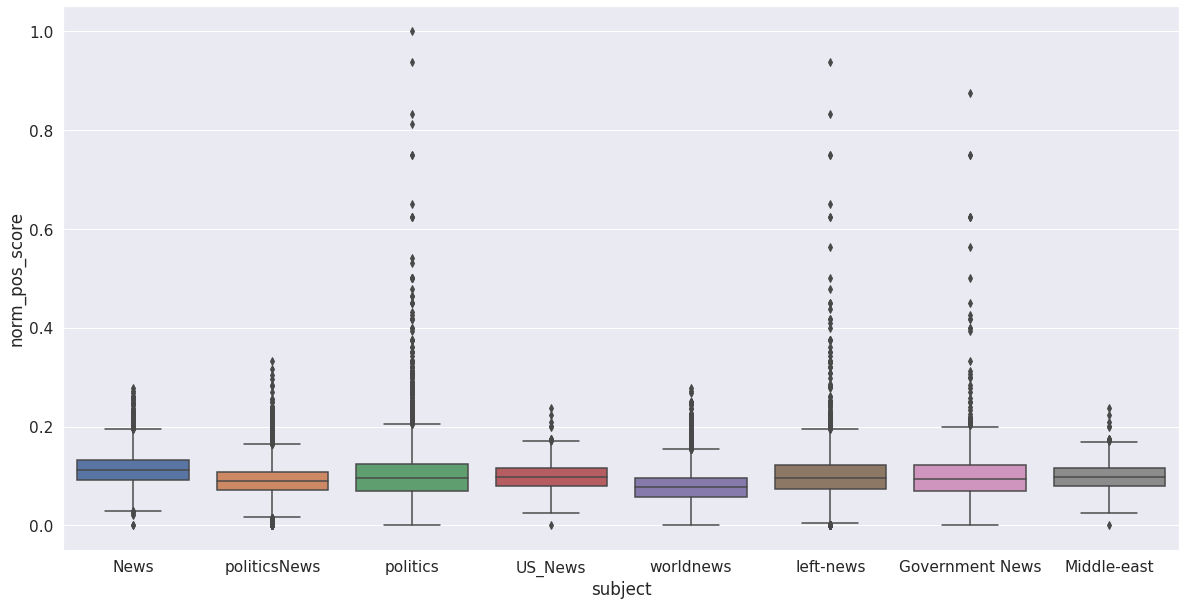

In [134]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.boxplot(x=data.subject, y=data.norm_pos_score)

<AxesSubplot:xlabel='subject', ylabel='norm_neg_score'>

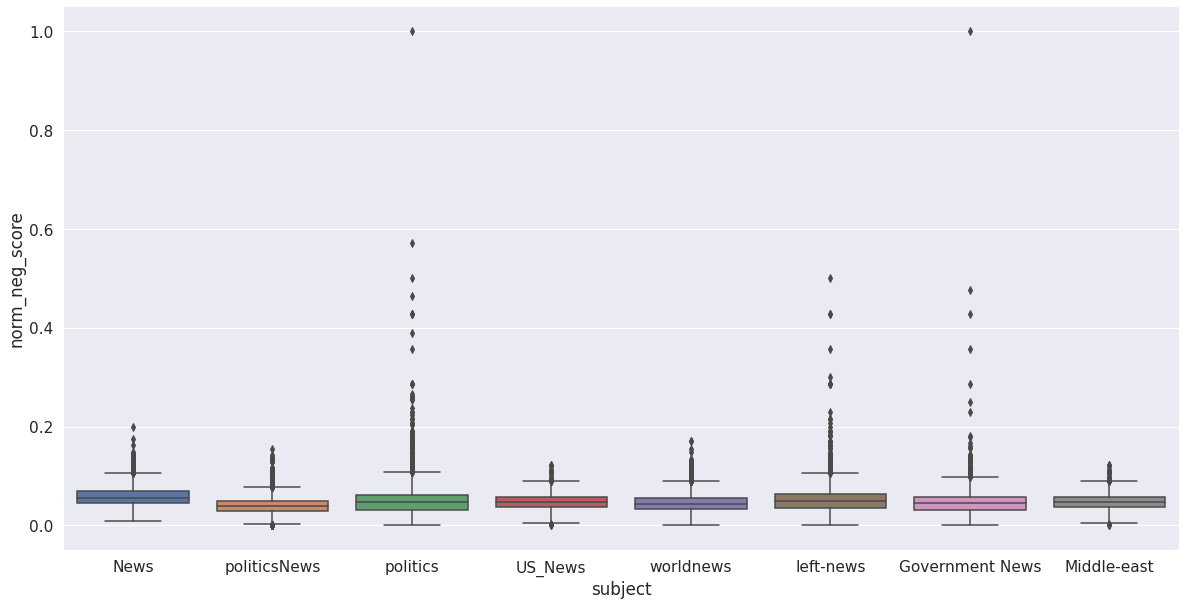

In [135]:
sns.boxplot(x=data.subject, y=data.norm_neg_score)

<AxesSubplot:xlabel='label', ylabel='norm_pos_score'>

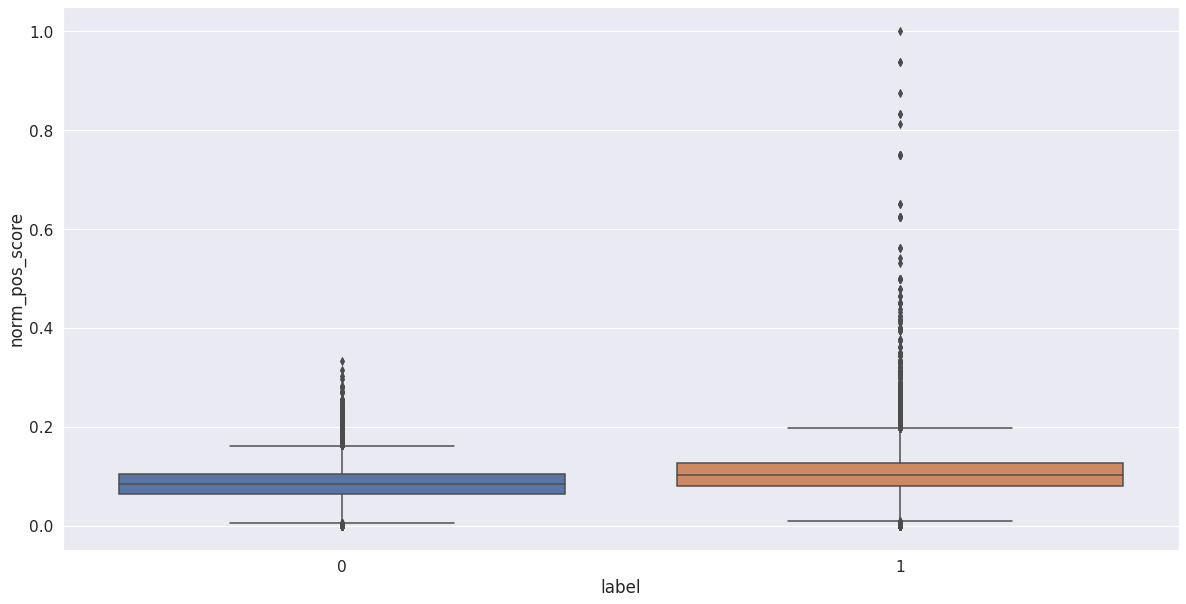

In [136]:
sns.boxplot(x=data.label, y=data.norm_pos_score)

<AxesSubplot:xlabel='label', ylabel='norm_neg_score'>

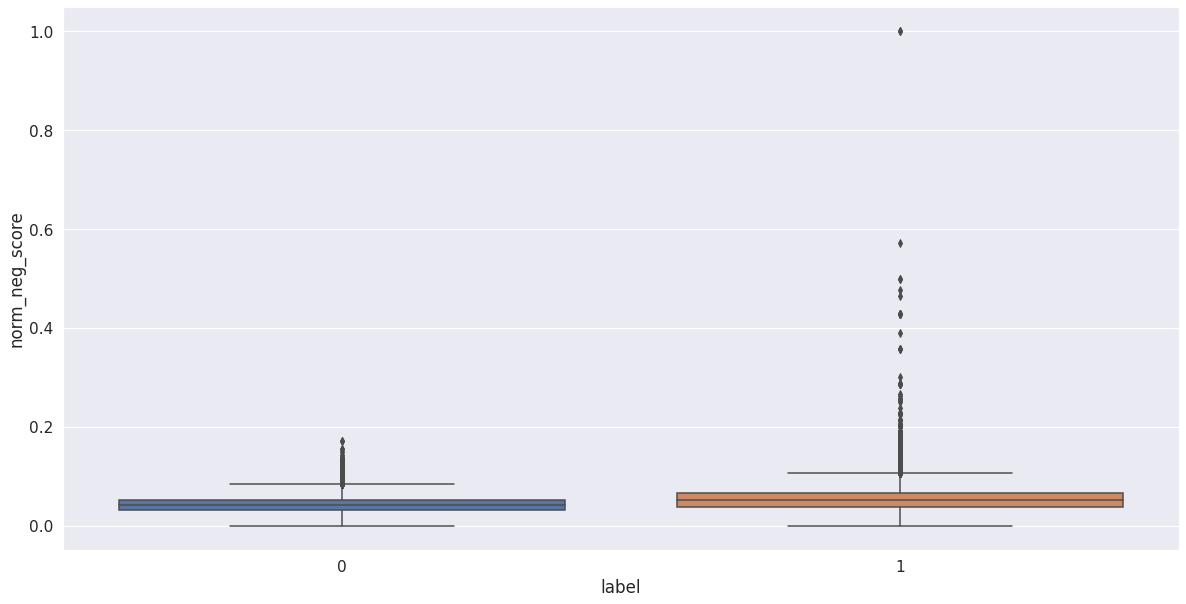

In [137]:
sns.boxplot(x=data.label, y=data.norm_neg_score)

In [138]:
label_true = data[data['label'] == 0]
label_fake = data[data['label'] == 1]

In [139]:
label_true.norm_pos_score.describe()

count    21417.000000
mean         0.084707
std          0.033029
min          0.000000
25%          0.064394
50%          0.084052
75%          0.103448
max          0.333333
Name: norm_pos_score, dtype: float64

In [141]:
label_fake.norm_pos_score.describe()

count    23481.000000
mean         0.104498
std          0.050056
min          0.000000
25%          0.079762
50%          0.102584
75%          0.126894
max          1.000000
Name: norm_pos_score, dtype: float64

In [140]:
label_true.norm_neg_score.describe()

count    21417.000000
mean         0.041988
std          0.017793
min          0.000000
25%          0.030769
50%          0.040859
75%          0.051948
max          0.171429
Name: norm_neg_score, dtype: float64

In [145]:
label_fake.norm_neg_score.describe()

count    23481.000000
mean         0.052277
std          0.028254
min          0.000000
25%          0.037594
50%          0.051020
75%          0.065051
max          1.000000
Name: norm_neg_score, dtype: float64

In [143]:
data

,title,text,subject,label,tagged,sentiment_score,normalized_score,pos_score,neg_score,norm_pos_score,norm_neg_score
0,Trump Blasted Nordstrom For Dropping Ivanka’s...,It is absolutely insane how much one man can s...,News,1,"[(absolutely, r), (insane, a), (much, r), (one...",-0.028918,0.230665,0.041045,0.069963,0.082090,0.079957
1,Factbox: Trump on Twitter (Sept 26) - NFL rati...,The following statements were posted to the ve...,politicsNews,0,"[(following, v), (statements, n), (posted, v),...",0.030714,0.317403,0.063571,0.032857,0.127143,0.037551
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,1,"[(donald, a), (trump, n), (insulted, v), (peop...",-0.015940,0.249542,0.035235,0.051174,0.070470,0.058485
3,Trump preparing executive orders to reduce U.S...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,0,"[(washington, n), (reuters, n), (trump, v), (a...",0.055147,0.352941,0.091912,0.036765,0.183824,0.042017
4,RUDY GIULIANI SLAMS HILLARY After She Refuses ...,What in the world has become of the Democrat P...,politics,1,"[(world, n), (become, n), (democrat, n), (part...",0.002717,0.276680,0.044837,0.042120,0.089674,0.048137
...,...,...,...,...,...,...,...,...,...,...,...
44893,"In slap at Romney, Trump says he wants Hatch t...",SALT LAKE CITY (Reuters) - President Donald Tr...,politicsNews,0,"[(salt, a), (lake, v), (city, n), (reuters, n)...",0.018601,0.299784,0.053571,0.034970,0.107143,0.039966
44894,Mexican human rights group mulls legal action ...,MEXICO CITY (Reuters) - Mexico s National Huma...,worldnews,0,"[(mexico, a), (city, n), (reuters, n), (mexico...",-0.012069,0.255172,0.035345,0.047414,0.070690,0.054187
44895,German coalition parties not yet agreed on eur...,BERLIN (Reuters) - The German parties explorin...,worldnews,0,"[(berlin, n), (reuters, n), (german, a), (part...",0.053191,0.350097,0.066489,0.013298,0.132979,0.015198
44896,Tribal militia kill 43 in South Sudan's Jongle...,JUBA (Reuters) - A tribal militia killed at le...,worldnews,0,"[(juba, n), (reuters, n), (tribal, v), (militi...",-0.034000,0.223273,0.030000,0.064000,0.060000,0.073143


In [144]:
data.to_csv('weaklabeled_data.csv')

In [95]:
data

,title,text,subject,label,tagged,sentiment_score,normalized_score,weak_label
0,Trump Blasted Nordstrom For Dropping Ivanka’s...,It is absolutely insane how much one man can s...,News,1,"[(absolutely, r), (insane, a), (much, r), (one...",-0.028918,0.230665,1
1,Factbox: Trump on Twitter (Sept 26) - NFL rati...,The following statements were posted to the ve...,politicsNews,0,"[(following, v), (statements, n), (posted, v),...",0.030714,0.317403,1
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,1,"[(donald, a), (trump, n), (insulted, v), (peop...",-0.015940,0.249542,1
3,Trump preparing executive orders to reduce U.S...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,0,"[(washington, n), (reuters, n), (trump, v), (a...",0.055147,0.352941,1
4,RUDY GIULIANI SLAMS HILLARY After She Refuses ...,What in the world has become of the Democrat P...,politics,1,"[(world, n), (become, n), (democrat, n), (part...",0.002717,0.276680,1
...,...,...,...,...,...,...,...,...
44893,"In slap at Romney, Trump says he wants Hatch t...",SALT LAKE CITY (Reuters) - President Donald Tr...,politicsNews,0,"[(salt, a), (lake, v), (city, n), (reuters, n)...",0.018601,0.299784,1
44894,Mexican human rights group mulls legal action ...,MEXICO CITY (Reuters) - Mexico s National Huma...,worldnews,0,"[(mexico, a), (city, n), (reuters, n), (mexico...",-0.012069,0.255172,1
44895,German coalition parties not yet agreed on eur...,BERLIN (Reuters) - The German parties explorin...,worldnews,0,"[(berlin, n), (reuters, n), (german, a), (part...",0.053191,0.350097,1
44896,Tribal militia kill 43 in South Sudan's Jongle...,JUBA (Reuters) - A tribal militia killed at le...,worldnews,0,"[(juba, n), (reuters, n), (tribal, v), (militi...",-0.034000,0.223273,1


In [96]:
from sklearn.metrics import roc_auc_score, accuracy_score
print(roc_auc_score(data['label'], data['weak_label']))
print(accuracy_score(data['label'], data['weak_label']))

0.4999787061879818
0.522963160942581


# Weak label using snorkel

In [ ]:
data = pd.read_csv('weaklabeled_data.csv')

In [ ]:
ABSTAIN = -1
REAL = 0
FAKE = 1

In [ ]:
from snorkel.labeling import labeling_function

@labeling_function()
def lf_is_negative(x):
    # Return a label of SPAM if "http" in comment text, otherwise ABSTAIN
    return SPAM if "http" in x.text.lower() else ABSTAIN

# Word embeddings

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [ ]:
docs = data.text

In [ ]:
titles = data.title

In [ ]:
t = Tokenizer()
t.fit_on_texts(docs)

In [ ]:
vocab_size = len(t.word_index) + 1
vocab_size

In [ ]:
encoded_docs = t.texts_to_sequences(docs)

In [ ]:
max_length = len(max(encoded_docs, key=len))

In [ ]:
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
len(padded_docs)

In [ ]:
embeddings_index = dict()
with open('glove.6B/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

# Create a model

In [ ]:
y_weak = data.weak_label.values
y_true = data.label.values
y_weak

In [ ]:
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

In [ ]:
model.fit(padded_docs, y_weak, epochs=3, verbose=1, batch_size=16)

In [ ]:
model.save('keras_model')

In [ ]:
loss, accuracy = model.evaluate(padded_docs, y_weak, verbose=1)
print('Accuracy: %f' % (accuracy*100))